# Style exploration: By features

In [30]:
#imports
import sys
sys.path.append('/home/elenaruiz/Documents/TFG/FNC')
import pandas as pd
import numpy as np
from src.utils import io
import matplotlib.pyplot as plt
import seaborn as sns
from src.fake_news_detector.exploration.helpers import helpers as h

Import dataset to dataframe:

In [3]:
articles = io.read_json_file('/home/elenaruiz/Documents/TFG/FNC/src/data/dataset_style.json')
df = pd.DataFrame(data=articles['articles'])
df.dtypes

fake                                  bool
mean_character_per_word            float64
mean_noun_phrases                   object
mean_words_per_sentence            float64
n_quotes                            object
n_sentences                          int64
n_words                              int64
pert_different_words               float64
pert_total_adj                     float64
pert_total_conj_prep               float64
pert_total_negative_words          float64
pert_total_nouns                   float64
pert_total_positive_words          float64
pert_total_verbs                   float64
sentiment                          float64
title_n_words                        int64
title_pert_total_conj_prep         float64
title_pert_total_negative_words    float64
title_pert_total_positive_words    float64
title_sentiment                    float64
dtype: object

### NORMALIZE

NameError: name 'scaler' is not defined

Compare fake with no fake, splitting them in two dataframes:

In [4]:
fake_df = df.loc[df['fake'] == 1]
real_df = df.loc[df['fake'] == 0]

## Features

Exploration for each feature

### By sentiment

In [8]:
var_one = fake_df['sentiment'].describe()
var_two = real_df['sentiment'].describe()
print(var_one)
print(var_two)

count    56.000000
mean     -0.052637
std       0.284967
min      -0.621000
25%      -0.290154
50%      -0.027737
75%       0.154228
max       0.698880
Name: sentiment, dtype: float64
count    45.000000
mean      0.059052
std       0.384422
min      -0.991500
25%      -0.164310
50%       0.091089
75%       0.340878
max       0.987100
Name: sentiment, dtype: float64


- **Fake news**: BLUE
- **Real news**: ORANGE

Fake news sorprendentemente no suelen ser tan extremos en el sentimiento, en cambio las reales, existen más positivas que negativas. Pero tienen más extremos negativos y positivos. Es decir, si es negativo, lo es mucho mas que una fake new.

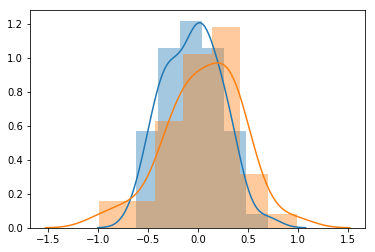

In [17]:
sns.distplot(tuple(fake_df['sentiment']));
sns.distplot(tuple(real_df['sentiment']));

In [42]:
neu_f = 0
pos_f = 0
neg_f = 0
for i in fake_df['sentiment']:
    if i < -0.2:
        neg_f += 1
    elif i > 0.2:
        pos_f += 1
    else:
        neu_f +=1
neu_r = 0
pos_r = 0
neg_r = 0
for i in real_df['sentiment']:
    if i < -0.2:
        neg_r += 1
    elif i > 0.2:
        pos_r += 1
    else:
        neu_r +=1

total = len(real_df)
print('Total Real: ' + str(total))
print('RESULT REAL NEWS:')
print('Positives ||', 'Num:',str(pos_r), 'Pert:', str(100*pos_r/total))
print('Negative  ||', 'Num:',str(neg_r), 'Pert:', str(100*neg_r/total))
print('Neutral   ||', 'Num:',str(neu_r), 'Pert:', str(100*neu_r/total))
print('-------------------------------------')
total = len(fake_df)
print('Total Real: ' + str(total))
print('RESULT FAKE NEWS:')
print('Positives ||', 'Num:',str(pos_f), 'Pert:', str(100*pos_f/total))
print('Negative  ||', 'Num:',str(neg_f), 'Pert:', str(100*neg_f/total))
print('Neutral   ||', 'Num:',str(neu_f), 'Pert:', str(100*neu_f/total))

Total Real: 45
RESULT REAL NEWS:
Positives || Num: 19 Pert: 42.22222222222222
Negative  || Num: 10 Pert: 22.22222222222222
Neutral   || Num: 16 Pert: 35.55555555555556
-------------------------------------
Total Real: 56
RESULT FAKE NEWS:
Positives || Num: 10 Pert: 17.857142857142858
Negative  || Num: 19 Pert: 33.92857142857143
Neutral   || Num: 27 Pert: 48.214285714285715


### Diferent words

In [19]:
var_one = fake_df['pert_different_words'].describe()
var_two = real_df['pert_different_words'].describe()
print(var_one)
print(var_two)

count    56.000000
mean      0.529026
std       0.060258
min       0.390476
25%       0.493391
50%       0.525549
75%       0.562616
max       0.668966
Name: pert_different_words, dtype: float64
count    45.000000
mean      0.498949
std       0.062098
min       0.383136
25%       0.461353
50%       0.487805
75%       0.532164
max       0.651515
Name: pert_different_words, dtype: float64


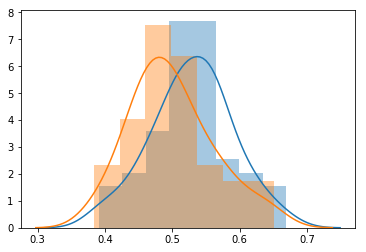

In [20]:
sns.distplot(tuple(fake_df['pert_different_words']));
sns.distplot(tuple(real_df['pert_different_words']));

In [27]:
# Get max and min values

min_v = min(fake_df['pert_different_words'].min(), real_df['pert_different_words'].min())
max_v = max(fake_df['pert_different_words'].max(), real_df['pert_different_words'].max())

tercio = (max_v - min_v) / 3
# Calculate 1/3
th_one = min_v + tercio
# Calculate 2/3
th_two = max_v - tercio
#print(min_v, max_v)
#print(th_one, th_two)
neu_f = 0
pos_f = 0
neg_f = 0
for i in fake_df['pert_different_words']:
    if i <= th_one:
        neg_f += 1
    elif i >= th_two:
        pos_f += 1
    else:
        neu_f +=1
neu_r = 0
pos_r = 0
neg_r = 0
for i in real_df['pert_different_words']:
    if i <= th_one:
        neg_r += 1
    elif i >= th_two:
        pos_r += 1
    else:
        neu_r +=1

total = len(real_df)
print('Total Real: ' + str(total))
print('RESULT REAL NEWS:')
print('Diversity ||', 'Num:',str(pos_r), 'Pert:', str(100*pos_r/total))
print('Repetitive  ||', 'Num:',str(neg_r), 'Pert:', str(100*neg_r/total))
print('Neutral   ||', 'Num:',str(neu_r), 'Pert:', str(100*neu_r/total))
print('-------------------------------------')
total = len(fake_df)
print('Total Real: ' + str(total))
print('RESULT FAKE NEWS:')
print('Diversity ||', 'Num:',str(pos_f), 'Pert:', str(100*pos_f/total))
print('Repetitive  ||', 'Num:',str(neg_f), 'Pert:', str(100*neg_f/total))
print('Neutral   ||', 'Num:',str(neu_f), 'Pert:', str(100*neu_f/total))

Total Real: 45
RESULT REAL NEWS:
Diversity || Num: 6 Pert: 13.333333333333334
Repetitive  || Num: 19 Pert: 42.22222222222222
Neutral   || Num: 20 Pert: 44.44444444444444
-------------------------------------
Total Real: 56
RESULT FAKE NEWS:
Diversity || Num: 10 Pert: 17.857142857142858
Repetitive  || Num: 11 Pert: 19.642857142857142
Neutral   || Num: 35 Pert: 62.5


### Positive words

In [29]:
var_one = fake_df['pert_total_positive_words'].describe()
var_two = real_df['pert_total_positive_words'].describe()
print(var_one)
print(var_two)

count    56.000000
mean      0.028175
std       0.016752
min       0.000000
25%       0.016378
50%       0.027588
75%       0.039455
max       0.087248
Name: pert_total_positive_words, dtype: float64
count    45.000000
mean      0.029184
std       0.016026
min       0.000000
25%       0.017677
50%       0.029851
75%       0.040541
max       0.060606
Name: pert_total_positive_words, dtype: float64


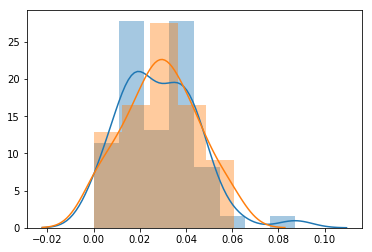

In [30]:
sns.distplot(tuple(fake_df['pert_total_positive_words']));
sns.distplot(tuple(real_df['pert_total_positive_words']));

In [33]:
neu_f = 0
pos_f = 0
neg_f = 0
for i in fake_df['pert_total_positive_words']:
    if i < 0.033:
        neg_f += 1
    elif i > 0.066:
        pos_f += 1
    else:
        neu_f +=1
neu_r = 0
pos_r = 0
neg_r = 0
for i in real_df['pert_total_positive_words']:
    if i < 0.033:
        neg_r += 1
    elif i > 0.066:
        pos_r += 1
    else:
        neu_r +=1

total = len(real_df)
print('Total Real: ' + str(total))
print('RESULT REAL NEWS:')
print('A lot     ||', 'Num:',str(pos_r), 'Pert:', str(100*pos_r/total))
print('Not much  ||', 'Num:',str(neg_r), 'Pert:', str(100*neg_r/total))
print('Middle    ||', 'Num:',str(neu_r), 'Pert:', str(100*neu_r/total))
print('-------------------------------------')
total = len(fake_df)
print('Total Real: ' + str(total))
print('RESULT FAKE NEWS:')
print('A lot     ||', 'Num:',str(pos_f), 'Pert:', str(100*pos_f/total))
print('Not much  ||', 'Num:',str(neg_f), 'Pert:', str(100*neg_f/total))
print('Middle    ||', 'Num:',str(neu_f), 'Pert:', str(100*neu_f/total))

Total Real: 45
RESULT REAL NEWS:
A lot     || Num: 0 Pert: 0.0
Not much  || Num: 29 Pert: 64.44444444444444
Middle    || Num: 16 Pert: 35.55555555555556
-------------------------------------
Total Real: 56
RESULT FAKE NEWS:
A lot     || Num: 1 Pert: 1.7857142857142858
Not much  || Num: 32 Pert: 57.142857142857146
Middle    || Num: 23 Pert: 41.07142857142857


### Negative words

In [35]:
var_one = fake_df['pert_total_negative_words'].describe()
var_two = real_df['pert_total_negative_words'].describe()
print(var_one)
print(var_two)

count    56.000000
mean      0.029918
std       0.019086
min       0.000000
25%       0.014441
50%       0.026106
75%       0.041725
max       0.085890
Name: pert_total_negative_words, dtype: float64
count    45.000000
mean      0.022982
std       0.019401
min       0.000000
25%       0.008711
50%       0.019912
75%       0.030928
max       0.083636
Name: pert_total_negative_words, dtype: float64


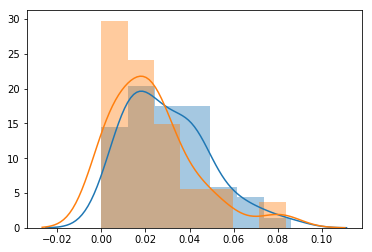

In [37]:
sns.distplot(tuple(fake_df['pert_total_negative_words']));
sns.distplot(tuple(real_df['pert_total_negative_words']));

In [38]:
neu_f = 0
pos_f = 0
neg_f = 0
for i in fake_df['pert_total_negative_words']:
    if i < 0.033:
        neg_f += 1
    elif i > 0.066:
        pos_f += 1
    else:
        neu_f +=1
neu_r = 0
pos_r = 0
neg_r = 0
for i in real_df['pert_total_negative_words']:
    if i < 0.033:
        neg_r += 1
    elif i > 0.066:
        pos_r += 1
    else:
        neu_r +=1

total = len(real_df)
print('Total Real: ' + str(total))
print('RESULT REAL NEWS:')
print('A lot     ||', 'Num:',str(pos_r), 'Pert:', str(100*pos_r/total))
print('Not much  ||', 'Num:',str(neg_r), 'Pert:', str(100*neg_r/total))
print('Middle    ||', 'Num:',str(neu_r), 'Pert:', str(100*neu_r/total))
print('-------------------------------------')
total = len(fake_df)
print('Total Real: ' + str(total))
print('RESULT FAKE NEWS:')
print('A lot     ||', 'Num:',str(pos_f), 'Pert:', str(100*pos_f/total))
print('Not much  ||', 'Num:',str(neg_f), 'Pert:', str(100*neg_f/total))
print('Middle    ||', 'Num:',str(neu_f), 'Pert:', str(100*neu_f/total))

Total Real: 45
RESULT REAL NEWS:
A lot     || Num: 2 Pert: 4.444444444444445
Not much  || Num: 36 Pert: 80.0
Middle    || Num: 7 Pert: 15.555555555555555
-------------------------------------
Total Real: 56
RESULT FAKE NEWS:
A lot     || Num: 3 Pert: 5.357142857142857
Not much  || Num: 35 Pert: 62.5
Middle    || Num: 18 Pert: 32.142857142857146


### Title sentiment

In [40]:
var_one = fake_df['title_sentiment'].describe()
var_two = real_df['title_sentiment'].describe()
print(var_one)
print(var_two)

count    56.000000
mean     -0.218770
std       0.339245
min      -0.784500
25%      -0.526700
50%      -0.226300
75%       0.000000
max       0.612400
Name: title_sentiment, dtype: float64
count    45.000000
mean     -0.065816
std       0.303476
min      -0.599400
25%      -0.296000
50%       0.000000
75%       0.025800
max       0.510600
Name: title_sentiment, dtype: float64


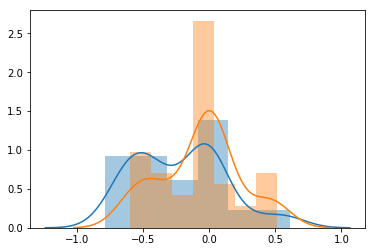

In [41]:
sns.distplot(tuple(fake_df['title_sentiment']));
sns.distplot(tuple(real_df['title_sentiment']));

In [44]:
neu_f = 0
pos_f = 0
neg_f = 0
for i in fake_df['title_sentiment']:
    if i < -0.2:
        neg_f += 1
    elif i > 0.2:
        pos_f += 1
    else:
        neu_f +=1
neu_r = 0
pos_r = 0
neg_r = 0
for i in real_df['title_sentiment']:
    if i < -0.2:
        neg_r += 1
    elif i > 0.2:
        pos_r += 1
    else:
        neu_r +=1

total = len(real_df)
print('Total Real: ' + str(total))
print('RESULT REAL NEWS:')
print('Positives ||', 'Num:',str(pos_r), 'Pert:', str(100*pos_r/total))
print('Negative  ||', 'Num:',str(neg_r), 'Pert:', str(100*neg_r/total))
print('Neutral   ||', 'Num:',str(neu_r), 'Pert:', str(100*neu_r/total))
print('-------------------------------------')
total = len(fake_df)
print('Total Real: ' + str(total))
print('RESULT FAKE NEWS:')
print('Positives ||', 'Num:',str(pos_f), 'Pert:', str(100*pos_f/total))
print('Negative  ||', 'Num:',str(neg_f), 'Pert:', str(100*neg_f/total))
print('Neutral   ||', 'Num:',str(neu_f), 'Pert:', str(100*neu_f/total))

Total Real: 45
RESULT REAL NEWS:
Positives || Num: 7 Pert: 15.555555555555555
Negative  || Num: 13 Pert: 28.88888888888889
Neutral   || Num: 25 Pert: 55.55555555555556
-------------------------------------
Total Real: 56
RESULT FAKE NEWS:
Positives || Num: 5 Pert: 8.928571428571429
Negative  || Num: 29 Pert: 51.785714285714285
Neutral   || Num: 22 Pert: 39.285714285714285


### Title positive words

In [46]:
var_one = fake_df['title_pert_total_positive_words'].describe()
var_two = real_df['title_pert_total_positive_words'].describe()
print(var_one)
print(var_two)

count    56.000000
mean      0.021081
std       0.044077
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       0.181818
Name: title_pert_total_positive_words, dtype: float64
count    45.000000
mean      0.029357
std       0.049676
min       0.000000
25%       0.000000
50%       0.000000
75%       0.071429
max       0.166667
Name: title_pert_total_positive_words, dtype: float64


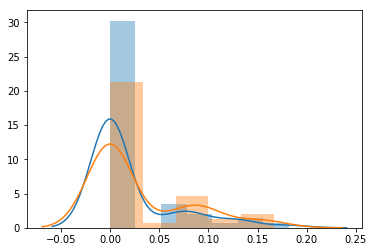

In [47]:
sns.distplot(tuple(fake_df['title_pert_total_positive_words']));
sns.distplot(tuple(real_df['title_pert_total_positive_words']));

In [48]:
# Get max and min values

min_v = min(fake_df['title_pert_total_positive_words'].min(), real_df['title_pert_total_positive_words'].min())
max_v = max(fake_df['title_pert_total_positive_words'].max(), real_df['title_pert_total_positive_words'].max())

tercio = (max_v - min_v) / 3
# Calculate 1/3
th_one = min_v + tercio
# Calculate 2/3
th_two = max_v - tercio
#print(min_v, max_v)
#print(th_one, th_two)
neu_f = 0
pos_f = 0
neg_f = 0
for i in fake_df['title_pert_total_positive_words']:
    if i <= th_one:
        neg_f += 1
    elif i >= th_two:
        pos_f += 1
    else:
        neu_f +=1
neu_r = 0
pos_r = 0
neg_r = 0
for i in real_df['title_pert_total_positive_words']:
    if i <= th_one:
        neg_r += 1
    elif i >= th_two:
        pos_r += 1
    else:
        neu_r +=1

total = len(real_df)
print('Total Real: ' + str(total))
print('RESULT REAL NEWS:')
print('A lot     ||', 'Num:',str(pos_r), 'Pert:', str(100*pos_r/total))
print('Not much  ||', 'Num:',str(neg_r), 'Pert:', str(100*neg_r/total))
print('Middle    ||', 'Num:',str(neu_r), 'Pert:', str(100*neu_r/total))
print('-------------------------------------')
total = len(fake_df)
print('Total Real: ' + str(total))
print('RESULT FAKE NEWS:')
print('A lot     ||', 'Num:',str(pos_f), 'Pert:', str(100*pos_f/total))
print('Not much  ||', 'Num:',str(neg_f), 'Pert:', str(100*neg_f/total))
print('Middle    ||', 'Num:',str(neu_f), 'Pert:', str(100*neu_f/total))

Total Real: 45
RESULT REAL NEWS:
A lot     || Num: 3 Pert: 6.666666666666667
Not much  || Num: 33 Pert: 73.33333333333333
Middle    || Num: 9 Pert: 20.0
-------------------------------------
Total Real: 56
RESULT FAKE NEWS:
A lot     || Num: 4 Pert: 7.142857142857143
Not much  || Num: 45 Pert: 80.35714285714286
Middle    || Num: 7 Pert: 12.5


### Title negative words

In [11]:
var_one = fake_df['title_pert_total_negative_words'].describe()
var_two = real_df['title_pert_total_negative_words'].describe()
print(var_one)
print(var_two)

count    56.000000
mean      0.060857
std       0.066042
min       0.000000
25%       0.000000
50%       0.066667
75%       0.093182
max       0.250000
Name: title_pert_total_negative_words, dtype: float64
count    45.000000
mean      0.036491
std       0.055500
min       0.000000
25%       0.000000
50%       0.000000
75%       0.076923
max       0.250000
Name: title_pert_total_negative_words, dtype: float64


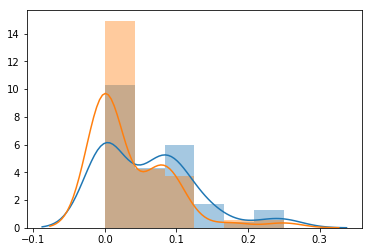

In [50]:
sns.distplot(tuple(fake_df['title_pert_total_negative_words']));
sns.distplot(tuple(real_df['title_pert_total_negative_words']));

In [51]:
# Get max and min values

min_v = min(fake_df['title_pert_total_negative_words'].min(), real_df['title_pert_total_negative_words'].min())
max_v = max(fake_df['title_pert_total_negative_words'].max(), real_df['title_pert_total_negative_words'].max())

tercio = (max_v - min_v) / 3
# Calculate 1/3
th_one = min_v + tercio
# Calculate 2/3
th_two = max_v - tercio
#print(min_v, max_v)
#print(th_one, th_two)
neu_f = 0
pos_f = 0
neg_f = 0
for i in fake_df['title_pert_total_negative_words']:
    if i <= th_one:
        neg_f += 1
    elif i >= th_two:
        pos_f += 1
    else:
        neu_f +=1
neu_r = 0
pos_r = 0
neg_r = 0
for i in real_df['title_pert_total_negative_words']:
    if i <= th_one:
        neg_r += 1
    elif i >= th_two:
        pos_r += 1
    else:
        neu_r +=1

total = len(real_df)
print('Total Real: ' + str(total))
print('RESULT REAL NEWS:')
print('A lot     ||', 'Num:',str(pos_r), 'Pert:', str(100*pos_r/total))
print('Not much  ||', 'Num:',str(neg_r), 'Pert:', str(100*neg_r/total))
print('Middle    ||', 'Num:',str(neu_r), 'Pert:', str(100*neu_r/total))
print('-------------------------------------')
total = len(fake_df)
print('Total Real: ' + str(total))
print('RESULT FAKE NEWS:')
print('A lot     ||', 'Num:',str(pos_f), 'Pert:', str(100*pos_f/total))
print('Not much  ||', 'Num:',str(neg_f), 'Pert:', str(100*neg_f/total))
print('Middle    ||', 'Num:',str(neu_f), 'Pert:', str(100*neu_f/total))

Total Real: 45
RESULT REAL NEWS:
A lot     || Num: 2 Pert: 4.444444444444445
Not much  || Num: 37 Pert: 82.22222222222223
Middle    || Num: 6 Pert: 13.333333333333334
-------------------------------------
Total Real: 56
RESULT FAKE NEWS:
A lot     || Num: 3 Pert: 5.357142857142857
Not much  || Num: 39 Pert: 69.64285714285714
Middle    || Num: 14 Pert: 25.0


### N words

In [52]:
var_one = fake_df['n_words'].describe()
var_two = real_df['n_words'].describe()
print(var_one)
print(var_two)

count     56.000000
mean     300.017857
std      163.233518
min      121.000000
25%      168.000000
50%      252.500000
75%      393.250000
max      874.000000
Name: n_words, dtype: float64
count     45.000000
mean     396.888889
std      183.862624
min      112.000000
25%      223.000000
50%      396.000000
75%      522.000000
max      832.000000
Name: n_words, dtype: float64


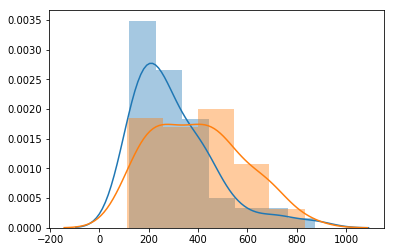

In [53]:
sns.distplot(tuple(fake_df['n_words']));
sns.distplot(tuple(real_df['n_words']));

In [54]:
# Get max and min values

min_v = min(fake_df['n_words'].min(), real_df['n_words'].min())
max_v = max(fake_df['n_words'].max(), real_df['n_words'].max())

tercio = (max_v - min_v) / 3
# Calculate 1/3
th_one = min_v + tercio
# Calculate 2/3
th_two = max_v - tercio
#print(min_v, max_v)
#print(th_one, th_two)
neu_f = 0
pos_f = 0
neg_f = 0
for i in fake_df['n_words']:
    if i <= th_one:
        neg_f += 1
    elif i >= th_two:
        pos_f += 1
    else:
        neu_f +=1
neu_r = 0
pos_r = 0
neg_r = 0
for i in real_df['n_words']:
    if i <= th_one:
        neg_r += 1
    elif i >= th_two:
        pos_r += 1
    else:
        neu_r +=1

total = len(real_df)
print('Total Real: ' + str(total))
print('RESULT REAL NEWS:')
print('A lot     ||', 'Num:',str(pos_r), 'Pert:', str(100*pos_r/total))
print('Not much  ||', 'Num:',str(neg_r), 'Pert:', str(100*neg_r/total))
print('Middle    ||', 'Num:',str(neu_r), 'Pert:', str(100*neu_r/total))
print('-------------------------------------')
total = len(fake_df)
print('Total Real: ' + str(total))
print('RESULT FAKE NEWS:')
print('A lot     ||', 'Num:',str(pos_f), 'Pert:', str(100*pos_f/total))
print('Not much  ||', 'Num:',str(neg_f), 'Pert:', str(100*neg_f/total))
print('Middle    ||', 'Num:',str(neu_f), 'Pert:', str(100*neu_f/total))

Total Real: 45
RESULT REAL NEWS:
A lot     || Num: 7 Pert: 15.555555555555555
Not much  || Num: 21 Pert: 46.666666666666664
Middle    || Num: 17 Pert: 37.77777777777778
-------------------------------------
Total Real: 56
RESULT FAKE NEWS:
A lot     || Num: 3 Pert: 5.357142857142857
Not much  || Num: 40 Pert: 71.42857142857143
Middle    || Num: 13 Pert: 23.214285714285715


### Mean word per sentence

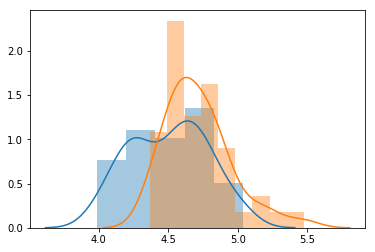

In [7]:
sns.distplot(tuple(fake_df['mean_words_per_sentence']));
sns.distplot(tuple(real_df['mean_words_per_sentence']));

In [8]:
# Get max and min values

min_v = min(fake_df['mean_words_per_sentence'].min(), real_df['mean_words_per_sentence'].min())
max_v = max(fake_df['mean_words_per_sentence'].max(), real_df['mean_words_per_sentence'].max())

tercio = (max_v - min_v) / 3
# Calculate 1/3
th_one = min_v + tercio
# Calculate 2/3
th_two = max_v - tercio
#print(min_v, max_v)
#print(th_one, th_two)
neu_f = 0
pos_f = 0
neg_f = 0
for i in fake_df['mean_words_per_sentence']:
    if i <= th_one:
        neg_f += 1
    elif i >= th_two:
        pos_f += 1
    else:
        neu_f +=1
neu_r = 0
pos_r = 0
neg_r = 0
for i in real_df['mean_words_per_sentence']:
    if i <= th_one:
        neg_r += 1
    elif i >= th_two:
        pos_r += 1
    else:
        neu_r +=1

total = len(real_df)
print('Total Real: ' + str(total))
print('RESULT REAL NEWS:')
print('A lot     ||', 'Num:',str(pos_r), 'Pert:', str(100*pos_r/total))
print('Not much  ||', 'Num:',str(neg_r), 'Pert:', str(100*neg_r/total))
print('Middle    ||', 'Num:',str(neu_r), 'Pert:', str(100*neu_r/total))
print('-------------------------------------')
total = len(fake_df)
print('Total Real: ' + str(total))
print('RESULT FAKE NEWS:')
print('A lot     ||', 'Num:',str(pos_f), 'Pert:', str(100*pos_f/total))
print('Not much  ||', 'Num:',str(neg_f), 'Pert:', str(100*neg_f/total))
print('Middle    ||', 'Num:',str(neu_f), 'Pert:', str(100*neu_f/total))

Total Real: 45
RESULT REAL NEWS:
A lot     || Num: 5 Pert: 11.11111111111111
Not much  || Num: 6 Pert: 13.333333333333334
Middle    || Num: 34 Pert: 75.55555555555556
-------------------------------------
Total Real: 56
RESULT FAKE NEWS:
A lot     || Num: 3 Pert: 5.357142857142857
Not much  || Num: 24 Pert: 42.857142857142854
Middle    || Num: 29 Pert: 51.785714285714285


### Mean character per word

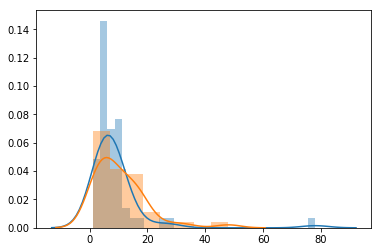

In [12]:
sns.distplot(tuple(fake_df['n_sentences']));
sns.distplot(tuple(real_df['n_sentences']));

In [18]:
# Get max and min values

min_v = min(fake_df['n_sentences'].min(), real_df['n_sentences'].min())
max_v = real_df['n_sentences'].max()

tercio = (max_v - min_v) / 3
# Calculate 1/3
th_one = min_v + tercio
# Calculate 2/3
th_two = max_v - tercio
#print(min_v, max_v)
#print(th_one, th_two)
neu_f = 0
pos_f = 0
neg_f = 0
for i in fake_df['n_sentences']:
    if i <= th_one:
        neg_f += 1
    elif i >= th_two:
        pos_f += 1
    else:
        neu_f +=1
neu_r = 0
pos_r = 0
neg_r = 0
for i in real_df['n_sentences']:
    if i <= th_one:
        neg_r += 1
    elif i >= th_two:
        pos_r += 1
    else:
        neu_r +=1

total = len(real_df)
print('Total Real: ' + str(total))
print('RESULT REAL NEWS:')
print('A lot     ||', 'Num:',str(pos_r), 'Pert:', str(100*pos_r/total))
print('Not much  ||', 'Num:',str(neg_r), 'Pert:', str(100*neg_r/total))
print('Middle    ||', 'Num:',str(neu_r), 'Pert:', str(100*neu_r/total))
print('-------------------------------------')
total = len(fake_df)
print('Total Real: ' + str(total))
print('RESULT FAKE NEWS:')
print('A lot     ||', 'Num:',str(pos_f), 'Pert:', str(100*pos_f/total))
print('Not much  ||', 'Num:',str(neg_f), 'Pert:', str(100*neg_f/total))
print('Middle    ||', 'Num:',str(neu_f), 'Pert:', str(100*neu_f/total))

Total Real: 45
RESULT REAL NEWS:
A lot     || Num: 2 Pert: 4.444444444444445
Not much  || Num: 37 Pert: 82.22222222222223
Middle    || Num: 6 Pert: 13.333333333333334
-------------------------------------
Total Real: 56
RESULT FAKE NEWS:
A lot     || Num: 1 Pert: 1.7857142857142858
Not much  || Num: 52 Pert: 92.85714285714286
Middle    || Num: 3 Pert: 5.357142857142857


### Different ADJ

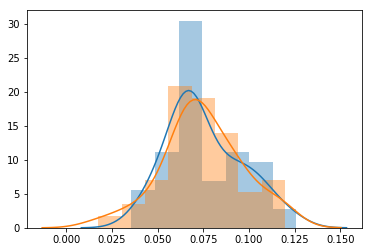

In [20]:
sns.distplot(tuple(fake_df['pert_total_adj']));
sns.distplot(tuple(real_df['pert_total_adj']));

In [35]:
# Get max and min values


min_i = min(fake_df['pert_total_adj'].min(), real_df['pert_total_adj'].min())
max_i = min(fake_df['pert_total_adj'].max(), real_df['pert_total_adj'].max())

third = (max_i - min_i) / 3
th_one = min_i + third
th_two = max_i - third
first_f = 0
second_f = 0
third_f = 0
for i in real_df['pert_total_adj']:
    if i <= th_one:
        first_f += 1
    elif i >= th_two:
        third_f += 1
    else:
        second_f +=1

res_r = [first_f, second_f, third_f]
total = len(real_df)
print('Total REAL: ' + str(total))
print('RESULT REAL NEWS:')
print('A lot     ||', 'Num:',str(res_r[2]), 'Pert:', str(100*res_r[2]/total))
print('Not much  ||', 'Num:',str(res_r[0]), 'Pert:', str(100*res_r[0]/total))
print('Middle    ||', 'Num:',str(res_r[1]), 'Pert:', str(100*res_r[1]/total))
print('-------------------------------------')

first_f = 0
second_f = 0
third_f = 0
for i in fake_df['pert_total_adj']:
    if i <= th_one:
        first_f += 1
    elif i >= th_two:
        third_f += 1
    else:
        second_f +=1
res_f = [first_f, second_f, third_f]
total = len(fake_df)
print('Total FAKE: ' + str(total))
print('RESULT FAKE NEWS:')
print('A lot     ||', 'Num:',str(res_f[2]), 'Pert:', str(100*res_f[2]/total))
print('Not much  ||', 'Num:',str(res_f[0]), 'Pert:', str(100*res_f[0]/total))
print('Middle    ||', 'Num:',str(res_f[1]), 'Pert:', str(100*res_f[1]/total))

Total REAL: 45
RESULT REAL NEWS:
A lot     || Num: 14 Pert: 31.11111111111111
Not much  || Num: 6 Pert: 13.333333333333334
Middle    || Num: 25 Pert: 55.55555555555556
-------------------------------------
Total FAKE: 56
RESULT FAKE NEWS:
A lot     || Num: 17 Pert: 30.357142857142858
Not much  || Num: 5 Pert: 8.928571428571429
Middle    || Num: 34 Pert: 60.714285714285715


### Different VERBS

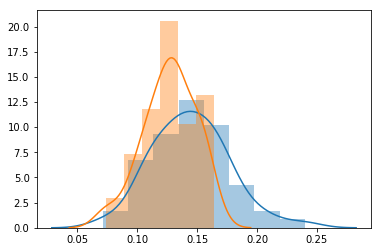

In [36]:
sns.distplot(tuple(fake_df['pert_total_verbs']));
sns.distplot(tuple(real_df['pert_total_verbs']));

In [38]:
# Get max and min values


min_i = min(fake_df['pert_total_verbs'].min(), real_df['pert_total_verbs'].min())
max_i = min(fake_df['pert_total_verbs'].max(), real_df['pert_total_verbs'].max())

third = (max_i - min_i) / 3
th_one = min_i + third
th_two = max_i - third
first_f = 0
second_f = 0
third_f = 0
for i in real_df['pert_total_verbs']:
    if i <= th_one:
        first_f += 1
    elif i >= th_two:
        third_f += 1
    else:
        second_f +=1

res_r = [first_f, second_f, third_f]
total = len(real_df)
print('Total REAL: ' + str(total))
print('RESULT REAL NEWS:')
print('A lot     ||', 'Num:',str(res_r[2]), 'Pert:', str(100*res_r[2]/total))
print('Not much  ||', 'Num:',str(res_r[0]), 'Pert:', str(100*res_r[0]/total))
print('Middle    ||', 'Num:',str(res_r[1]), 'Pert:', str(100*res_r[1]/total))
print('-------------------------------------')

first_f = 0
second_f = 0
third_f = 0
for i in fake_df['pert_total_verbs']:
    if i <= th_one:
        first_f += 1
    elif i >= th_two:
        third_f += 1
    else:
        second_f +=1
res_f = [first_f, second_f, third_f]
total = len(fake_df)
print('Total FAKE: ' + str(total))
print('RESULT FAKE NEWS:')
print('A lot     ||', 'Num:',str(res_f[2]), 'Pert:', str(100*res_f[2]/total))
print('Not much  ||', 'Num:',str(res_f[0]), 'Pert:', str(100*res_f[0]/total))
print('Middle    ||', 'Num:',str(res_f[1]), 'Pert:', str(100*res_f[1]/total))

Total REAL: 45
RESULT REAL NEWS:
A lot     || Num: 16 Pert: 35.55555555555556
Not much  || Num: 6 Pert: 13.333333333333334
Middle    || Num: 23 Pert: 51.111111111111114
-------------------------------------
Total FAKE: 56
RESULT FAKE NEWS:
A lot     || Num: 36 Pert: 64.28571428571429
Not much  || Num: 4 Pert: 7.142857142857143
Middle    || Num: 16 Pert: 28.571428571428573


### Different NOUNS

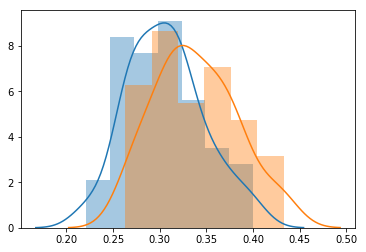

In [39]:
sns.distplot(tuple(fake_df['pert_total_nouns']));
sns.distplot(tuple(real_df['pert_total_nouns']));

In [40]:
# Get max and min values


min_i = min(fake_df['pert_total_nouns'].min(), real_df['pert_total_nouns'].min())
max_i = min(fake_df['pert_total_nouns'].max(), real_df['pert_total_nouns'].max())

third = (max_i - min_i) / 3
th_one = min_i + third
th_two = max_i - third
first_f = 0
second_f = 0
third_f = 0
for i in real_df['pert_total_nouns']:
    if i <= th_one:
        first_f += 1
    elif i >= th_two:
        third_f += 1
    else:
        second_f +=1

res_r = [first_f, second_f, third_f]
total = len(real_df)
print('Total REAL: ' + str(total))
print('RESULT REAL NEWS:')
print('A lot     ||', 'Num:',str(res_r[2]), 'Pert:', str(100*res_r[2]/total))
print('Not much  ||', 'Num:',str(res_r[0]), 'Pert:', str(100*res_r[0]/total))
print('Middle    ||', 'Num:',str(res_r[1]), 'Pert:', str(100*res_r[1]/total))
print('-------------------------------------')

first_f = 0
second_f = 0
third_f = 0
for i in fake_df['pert_total_nouns']:
    if i <= th_one:
        first_f += 1
    elif i >= th_two:
        third_f += 1
    else:
        second_f +=1
res_f = [first_f, second_f, third_f]
total = len(fake_df)
print('Total FAKE: ' + str(total))
print('RESULT FAKE NEWS:')
print('A lot     ||', 'Num:',str(res_f[2]), 'Pert:', str(100*res_f[2]/total))
print('Not much  ||', 'Num:',str(res_f[0]), 'Pert:', str(100*res_f[0]/total))
print('Middle    ||', 'Num:',str(res_f[1]), 'Pert:', str(100*res_f[1]/total))

Total REAL: 45
RESULT REAL NEWS:
A lot     || Num: 20 Pert: 44.44444444444444
Not much  || Num: 5 Pert: 11.11111111111111
Middle    || Num: 20 Pert: 44.44444444444444
-------------------------------------
Total FAKE: 56
RESULT FAKE NEWS:
A lot     || Num: 10 Pert: 17.857142857142858
Not much  || Num: 17 Pert: 30.357142857142858
Middle    || Num: 29 Pert: 51.785714285714285
